In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
from scipy import interpolate
from astropy.convolution import convolve, Box1DKernel, convolve_fft, Gaussian1DKernel
import matplotlib.patches as mpatches
from astropy.modeling import models, fitting
from scipy import stats

import lightkurve as lk

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
stars = ['GJ1132',
 'GJ15A',
 'GJ163',
 'GJ649',
 'GJ674',
 'GJ676A',
 'GJ699',
 'GJ729',
 'GJ849',
 'L 980-5',
 'LHS 2686',
 'TRAPPIST-1']



In [3]:
for star in stars:
    search_result = lk.search_lightcurve(star)
    print(star)
    print(search_result)

GJ1132
SearchResult containing 17 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 10 2019              SPOC     120   101955023      0.0
  1 TESS Sector 09 2019              SPOC     120   101955023      0.0
  2 TESS Sector 36 2021              SPOC      20   101955023      0.0
  3 TESS Sector 36 2021              SPOC     120   101955023      0.0
  4 TESS Sector 63 2023              SPOC      20   101955023      0.0
  5 TESS Sector 63 2023              SPOC     120   101955023      0.0
  6 TESS Sector 09 2019         TESS-SPOC    1800   101955023      0.0
  7 TESS Sector 10 2019         TESS-SPOC    1800   101955023      0.0
  8 TESS Sector 36 2021         TESS-SPOC     600   101955023      0.0
  9 TESS Sector 63 2023         TESS-SPOC     200   101955023      0.0
 10 TESS Sector 10 2019    

GJ1132
GJ1132
GJ1132
GJ1132
GJ15A
GJ15A
GJ163
GJ163
GJ163


GJ163
GJ163
GJ649
GJ649
GJ649
GJ674
GJ674
GJ674
GJ676A
GJ676A
GJ676A
GJ699
GJ849
GJ849
L 980-5
LHS 2686
LHS 2686
LHS 2686
LHS 2686
TRAPPIST-1


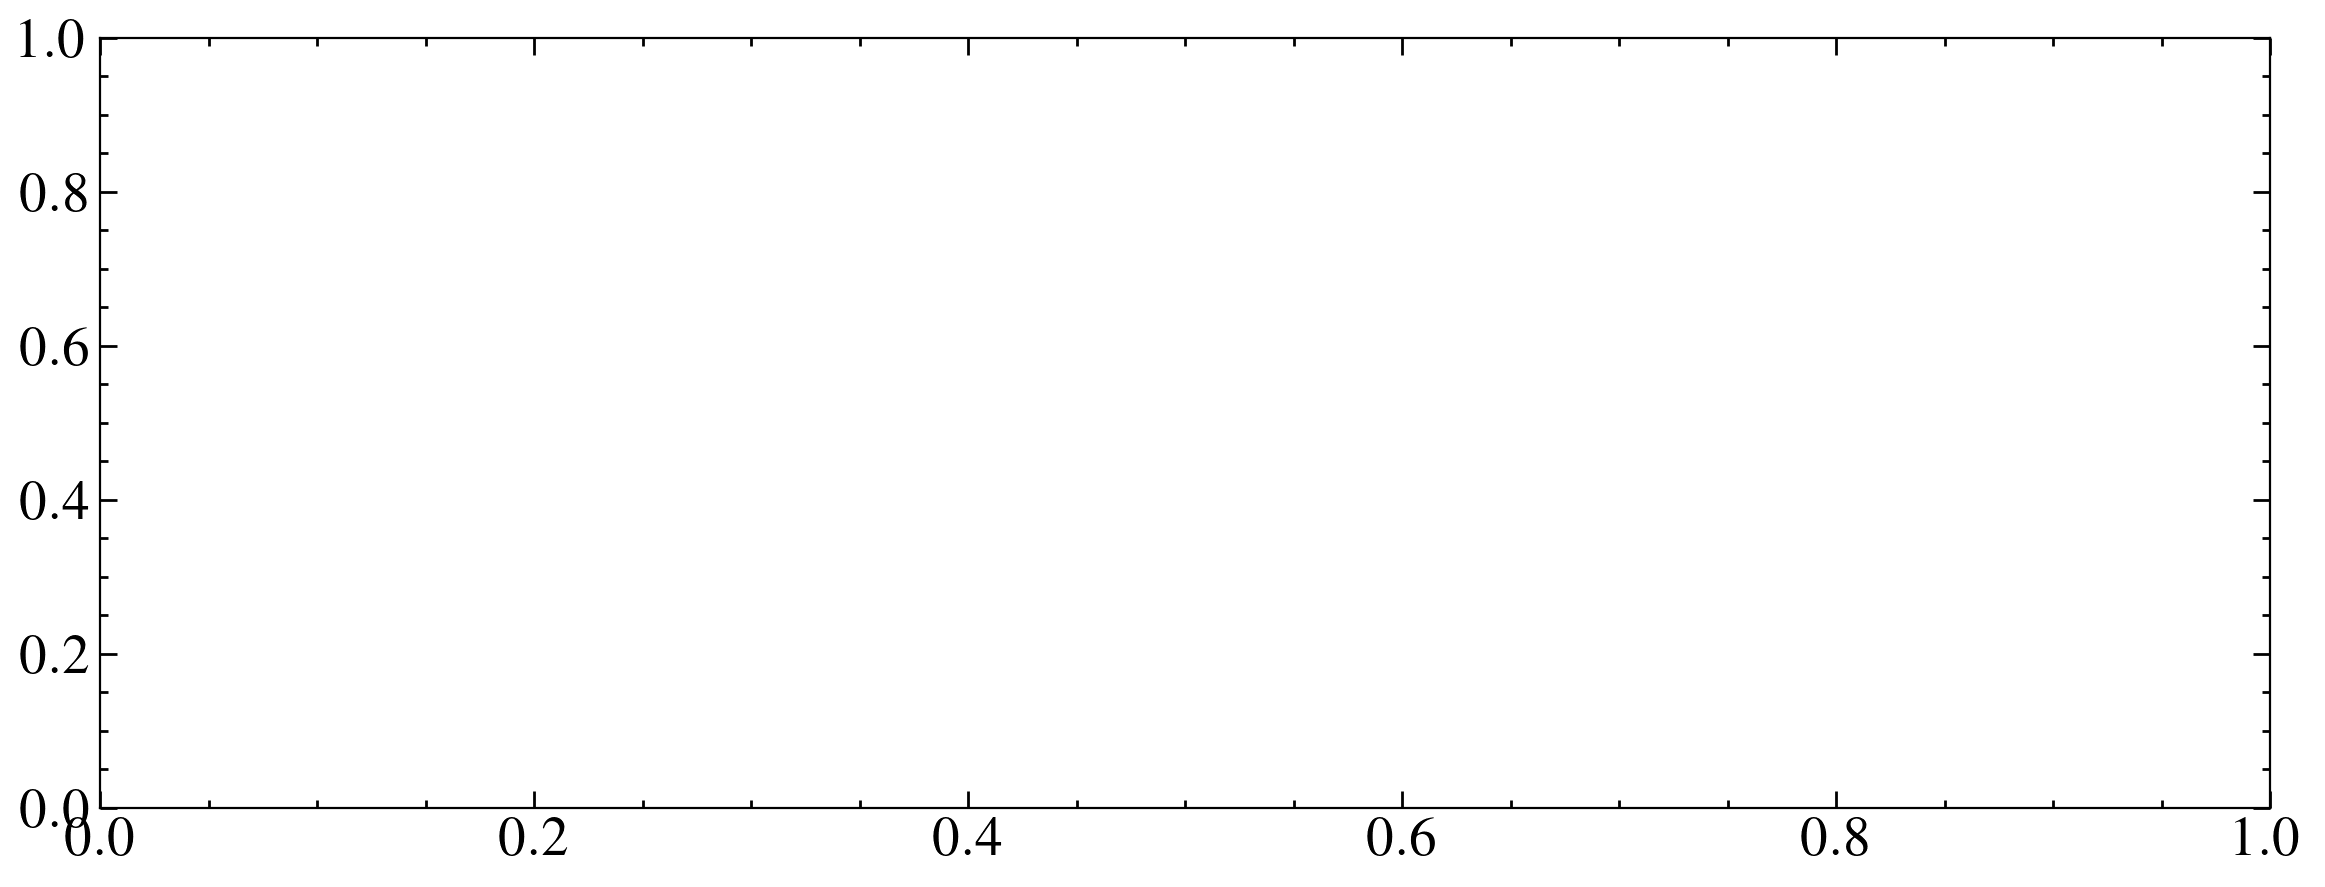

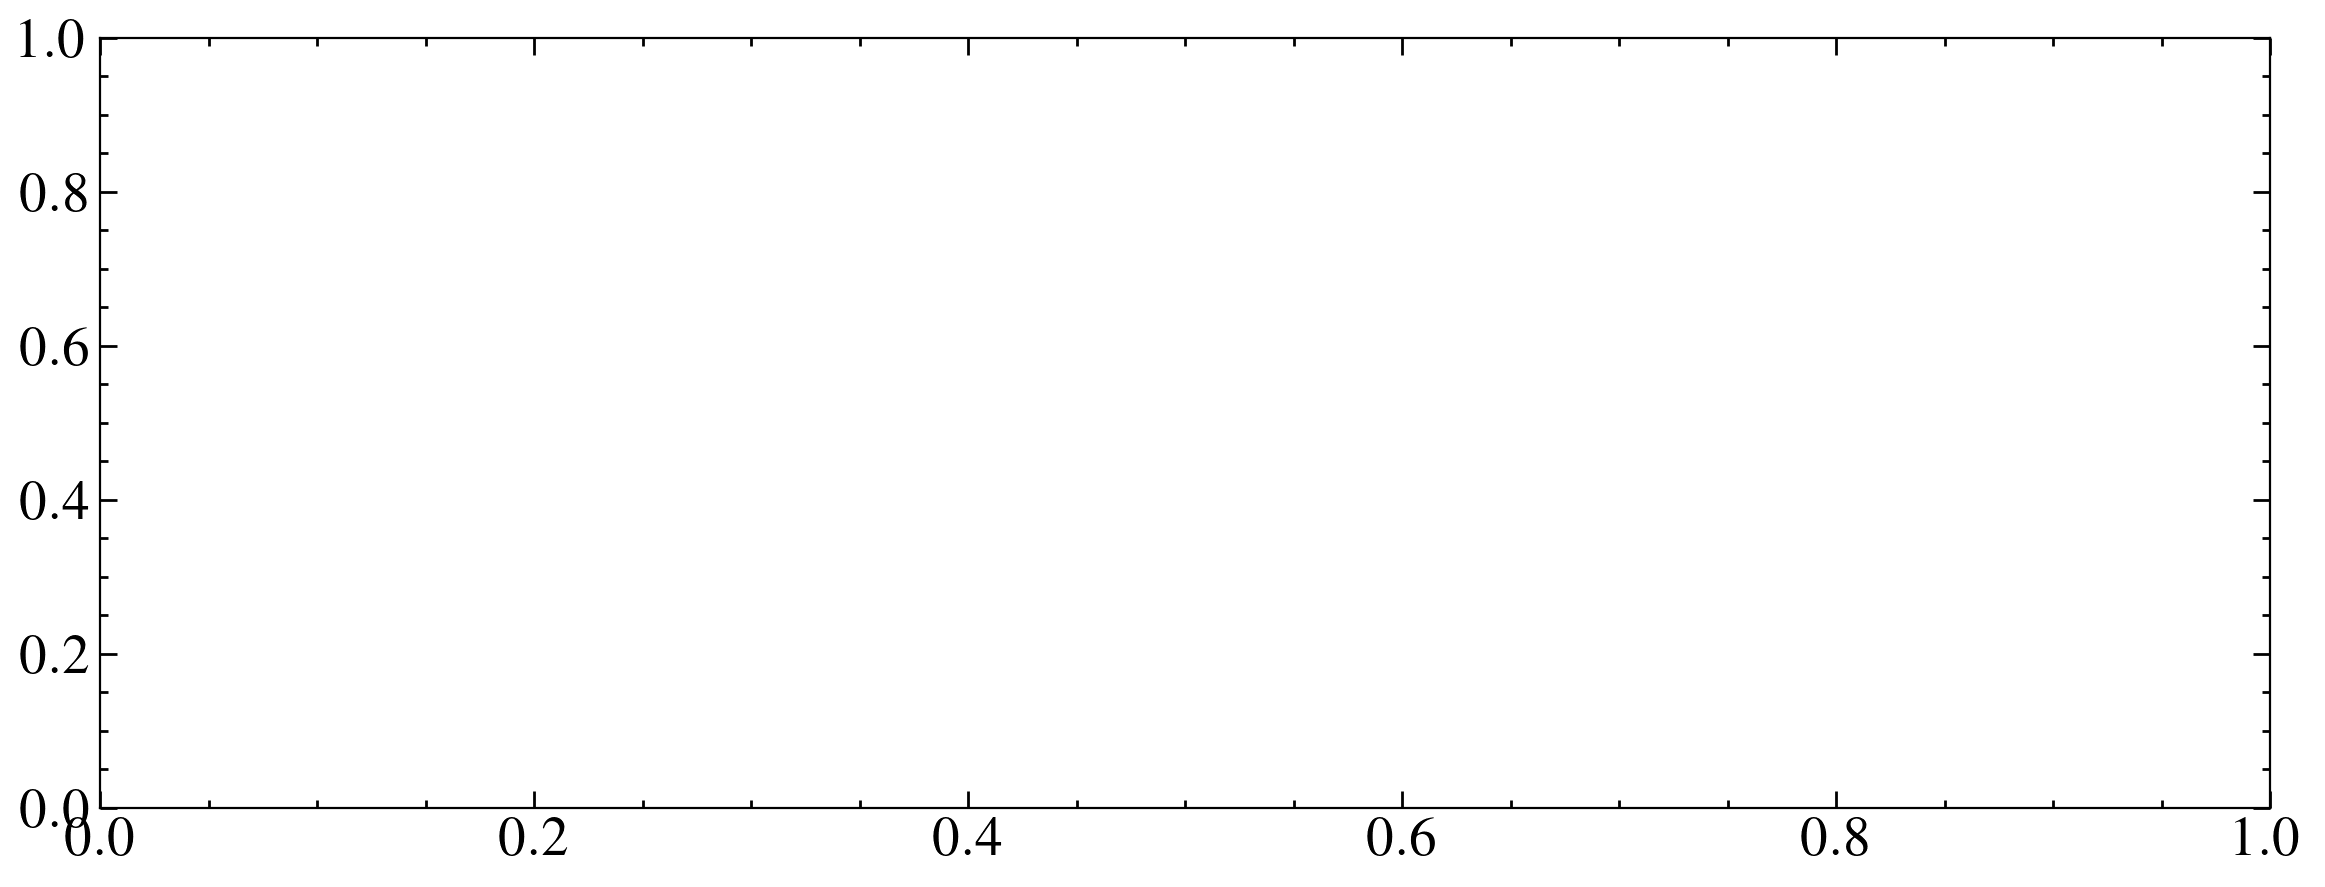

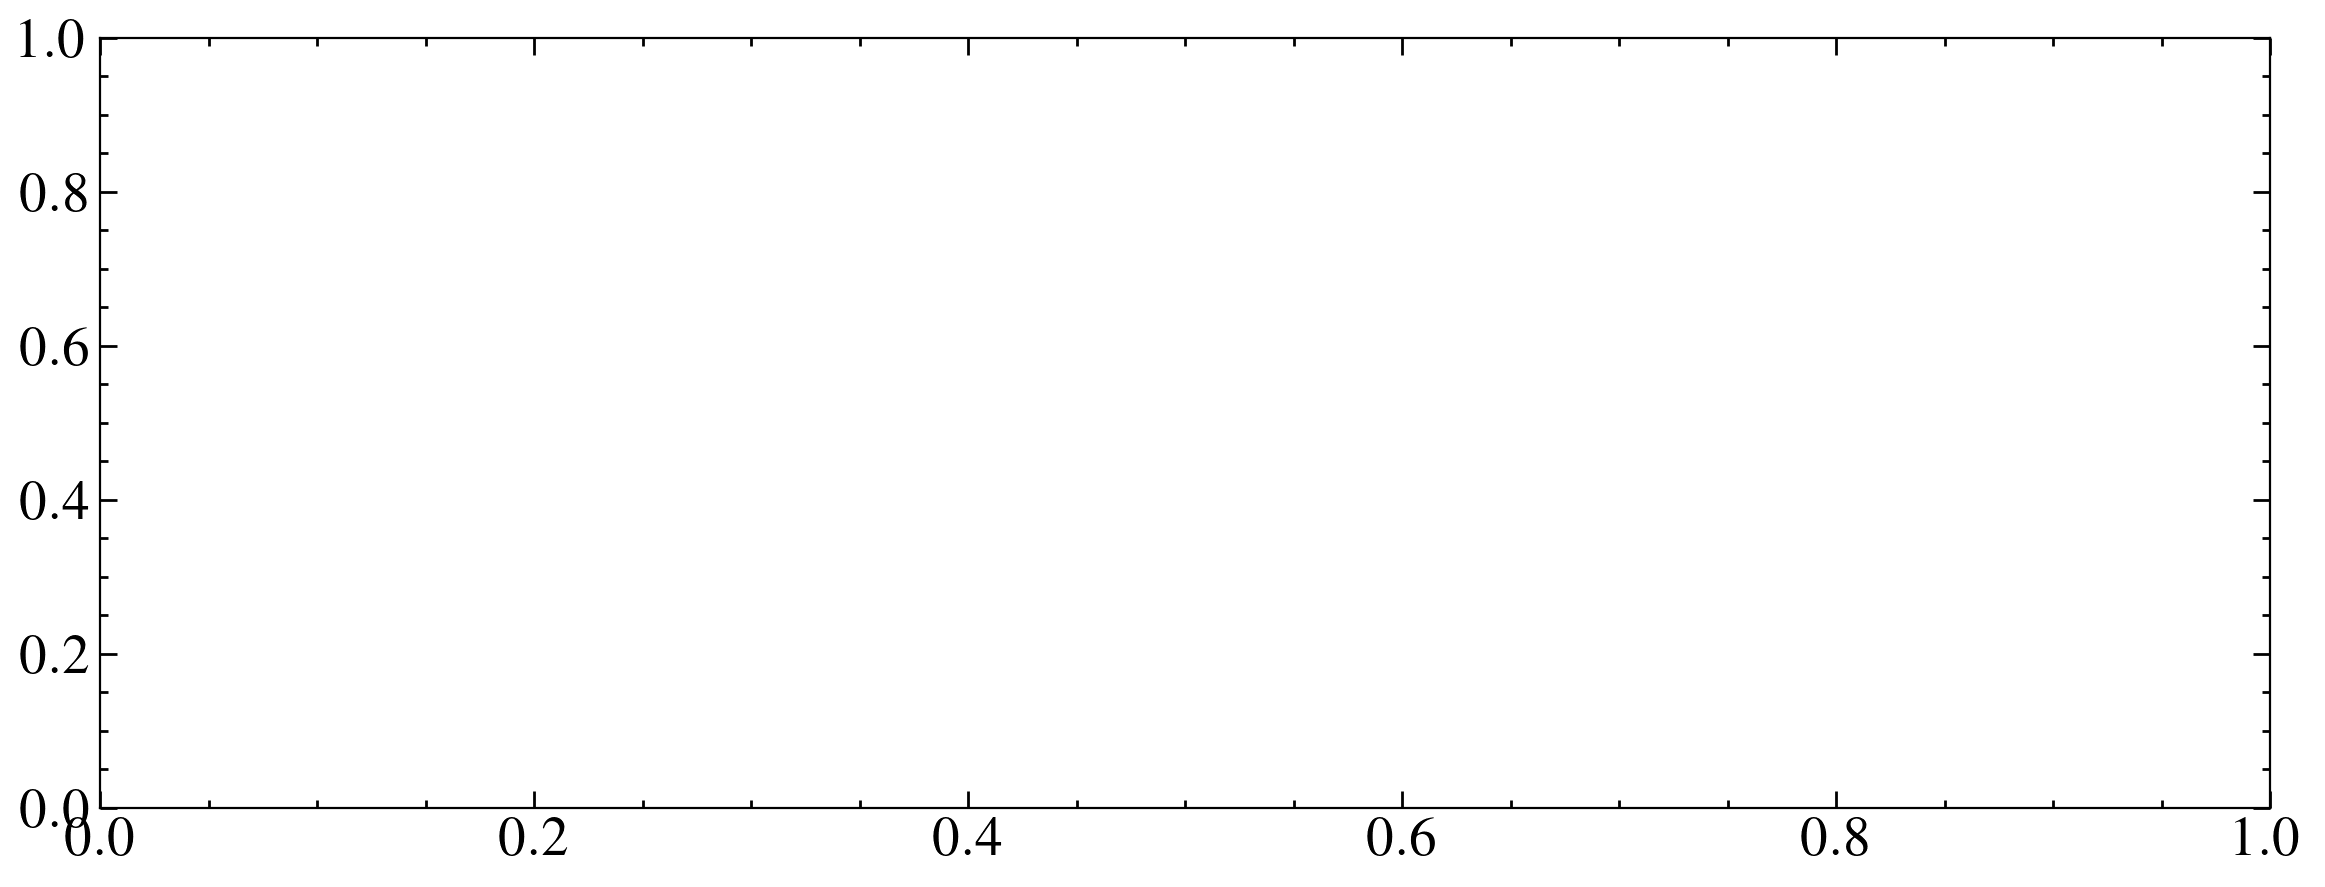

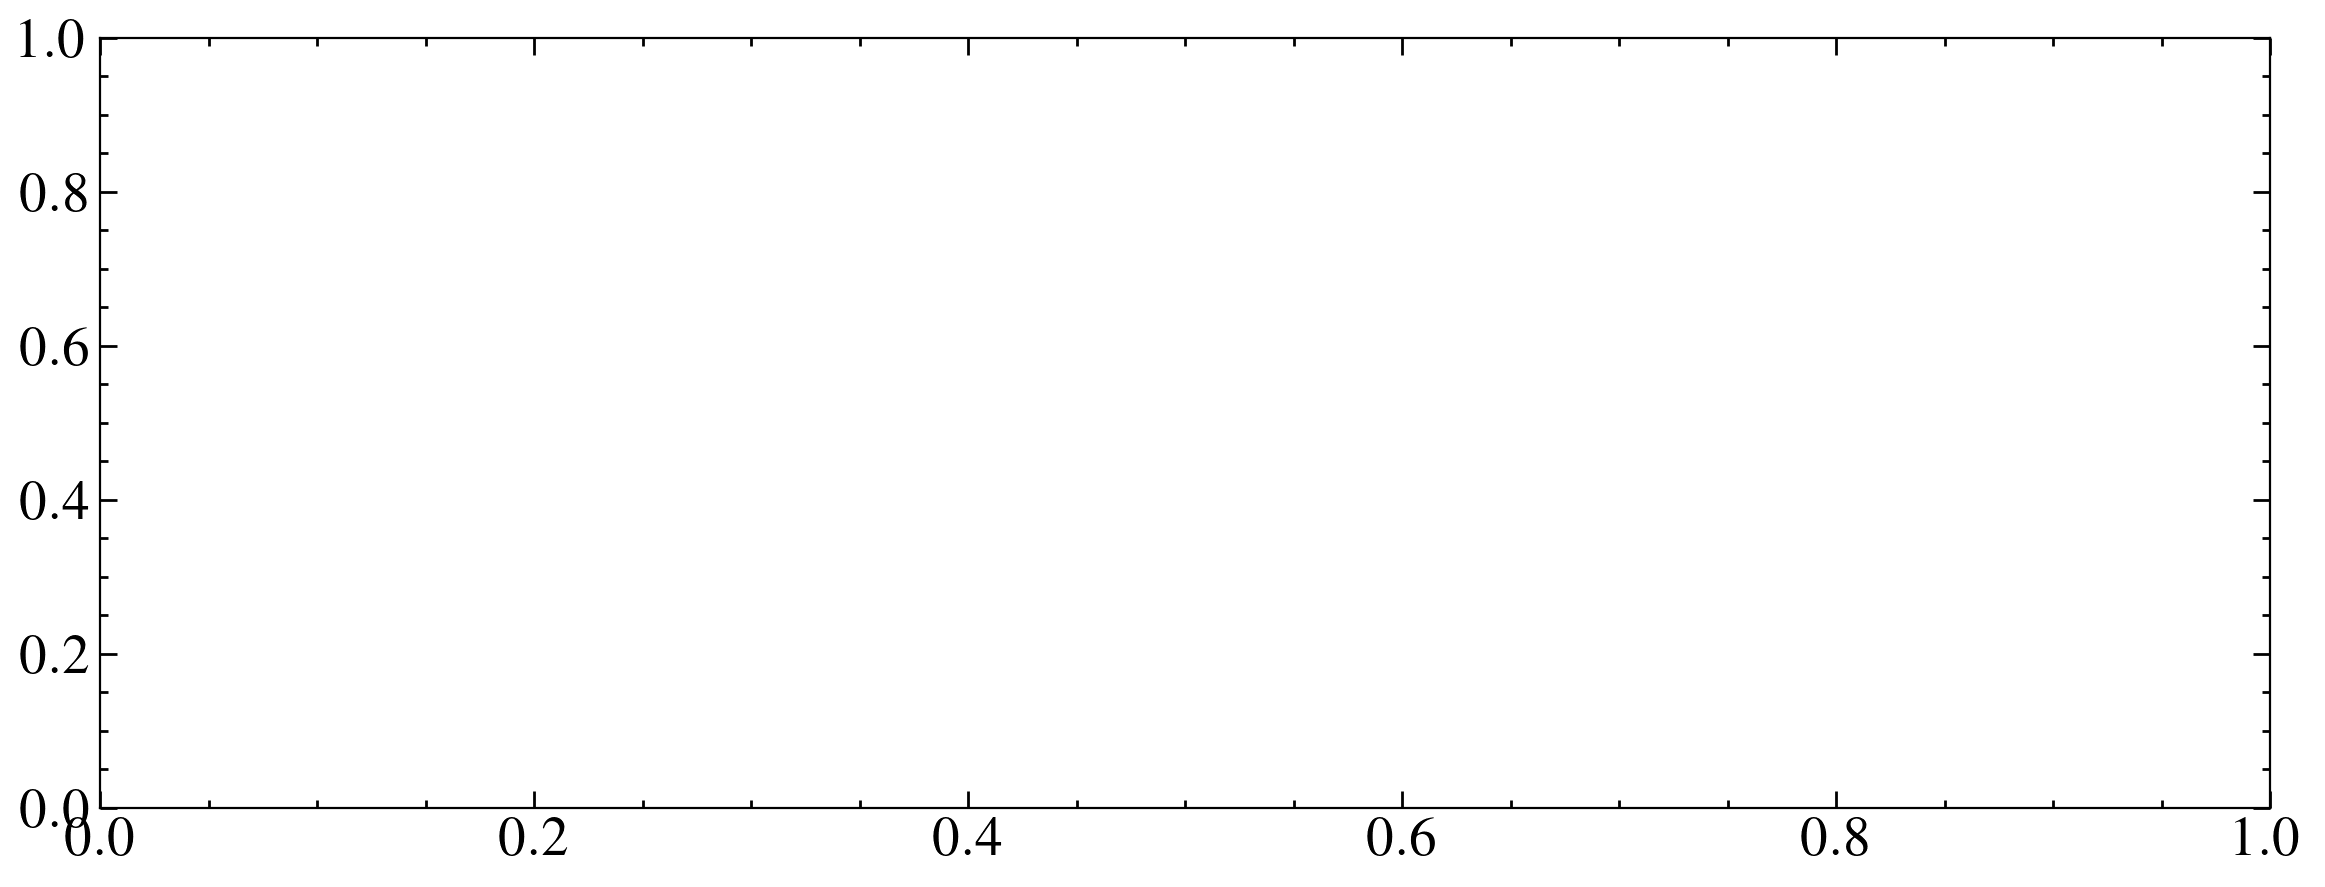

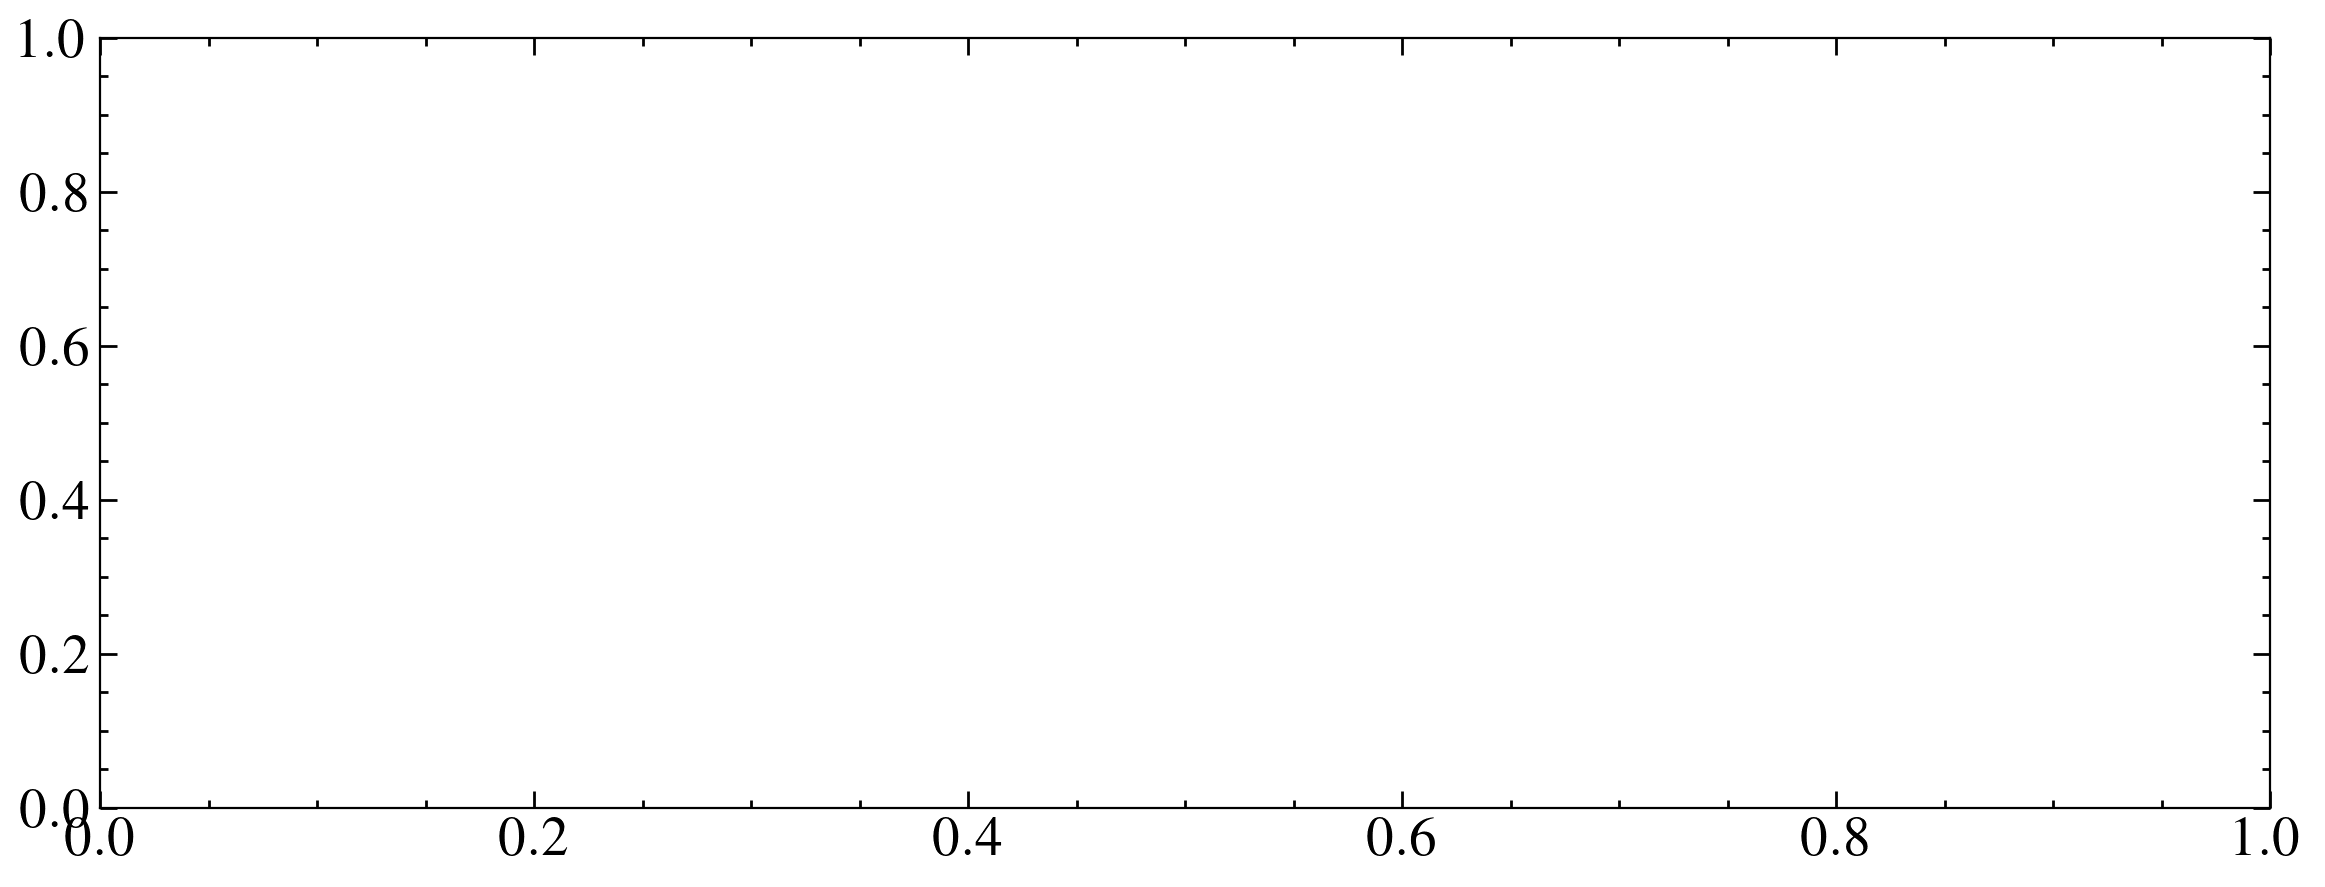

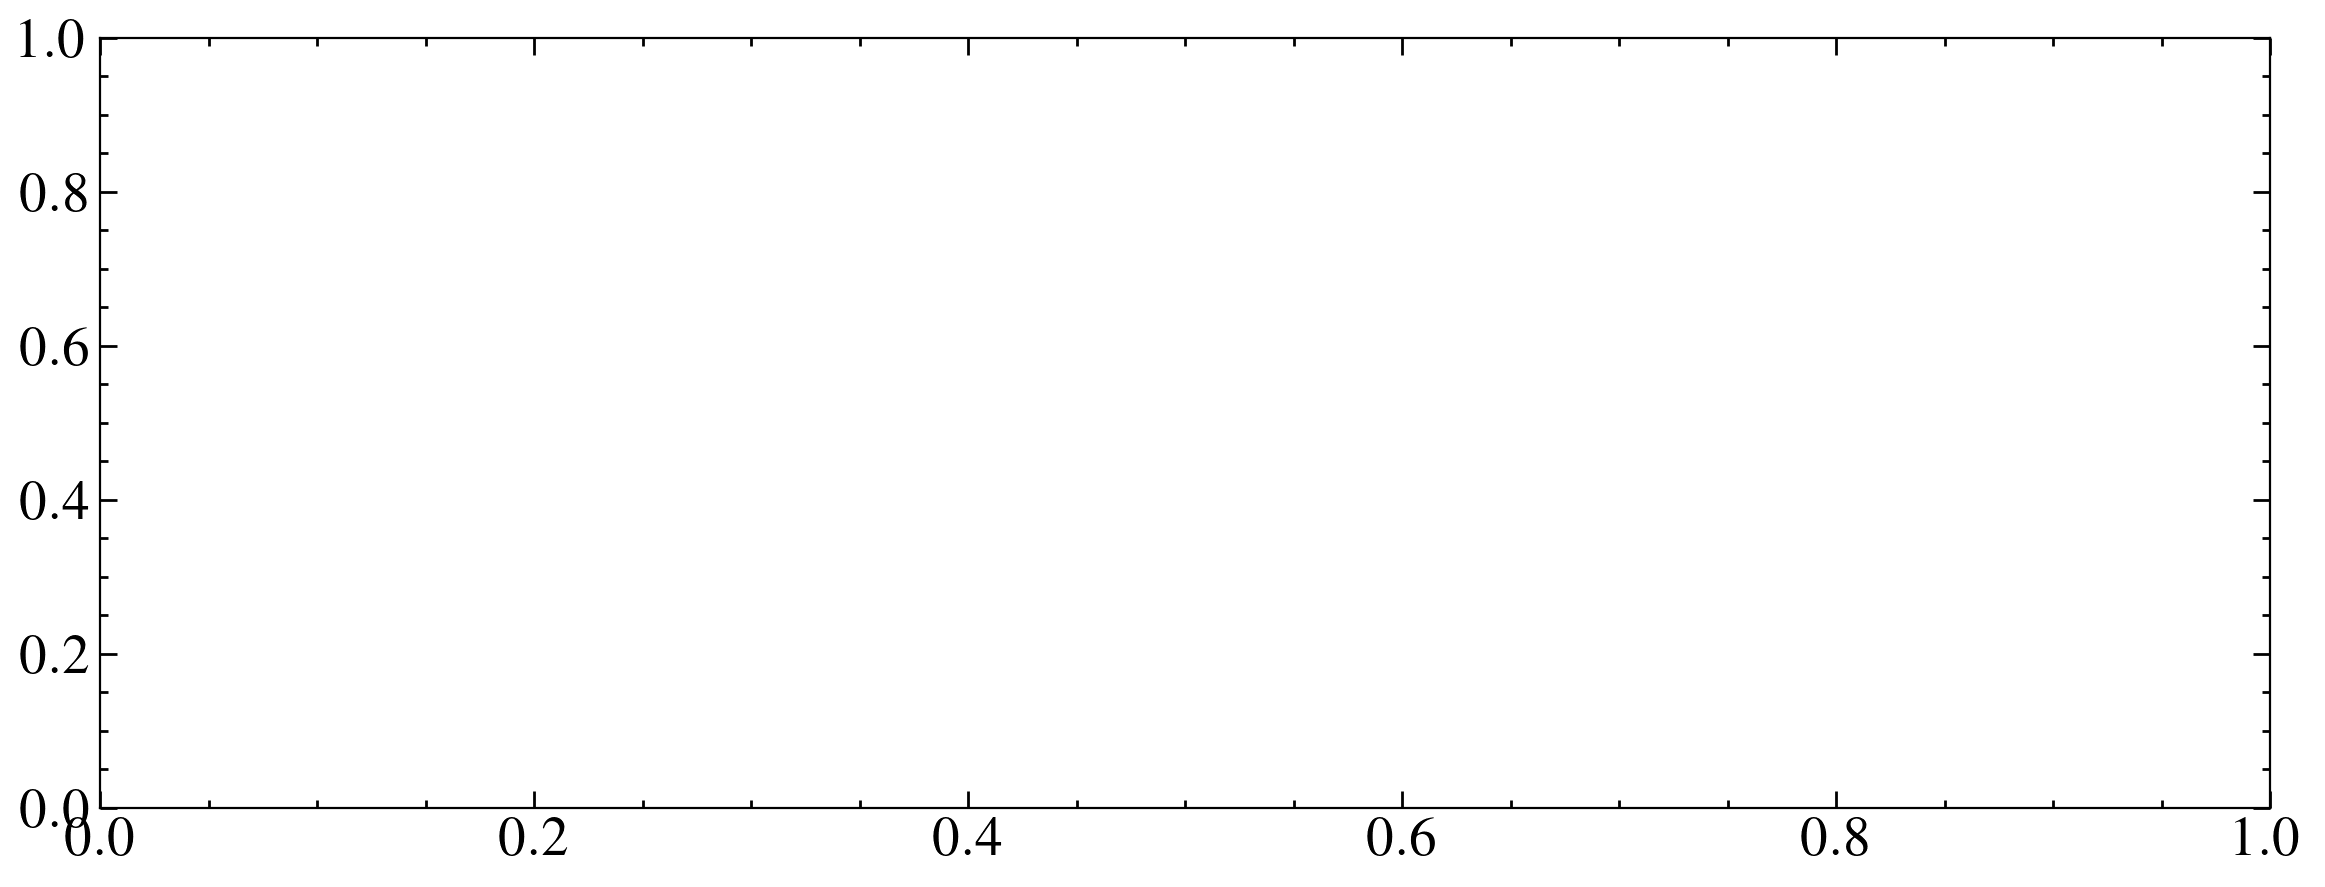

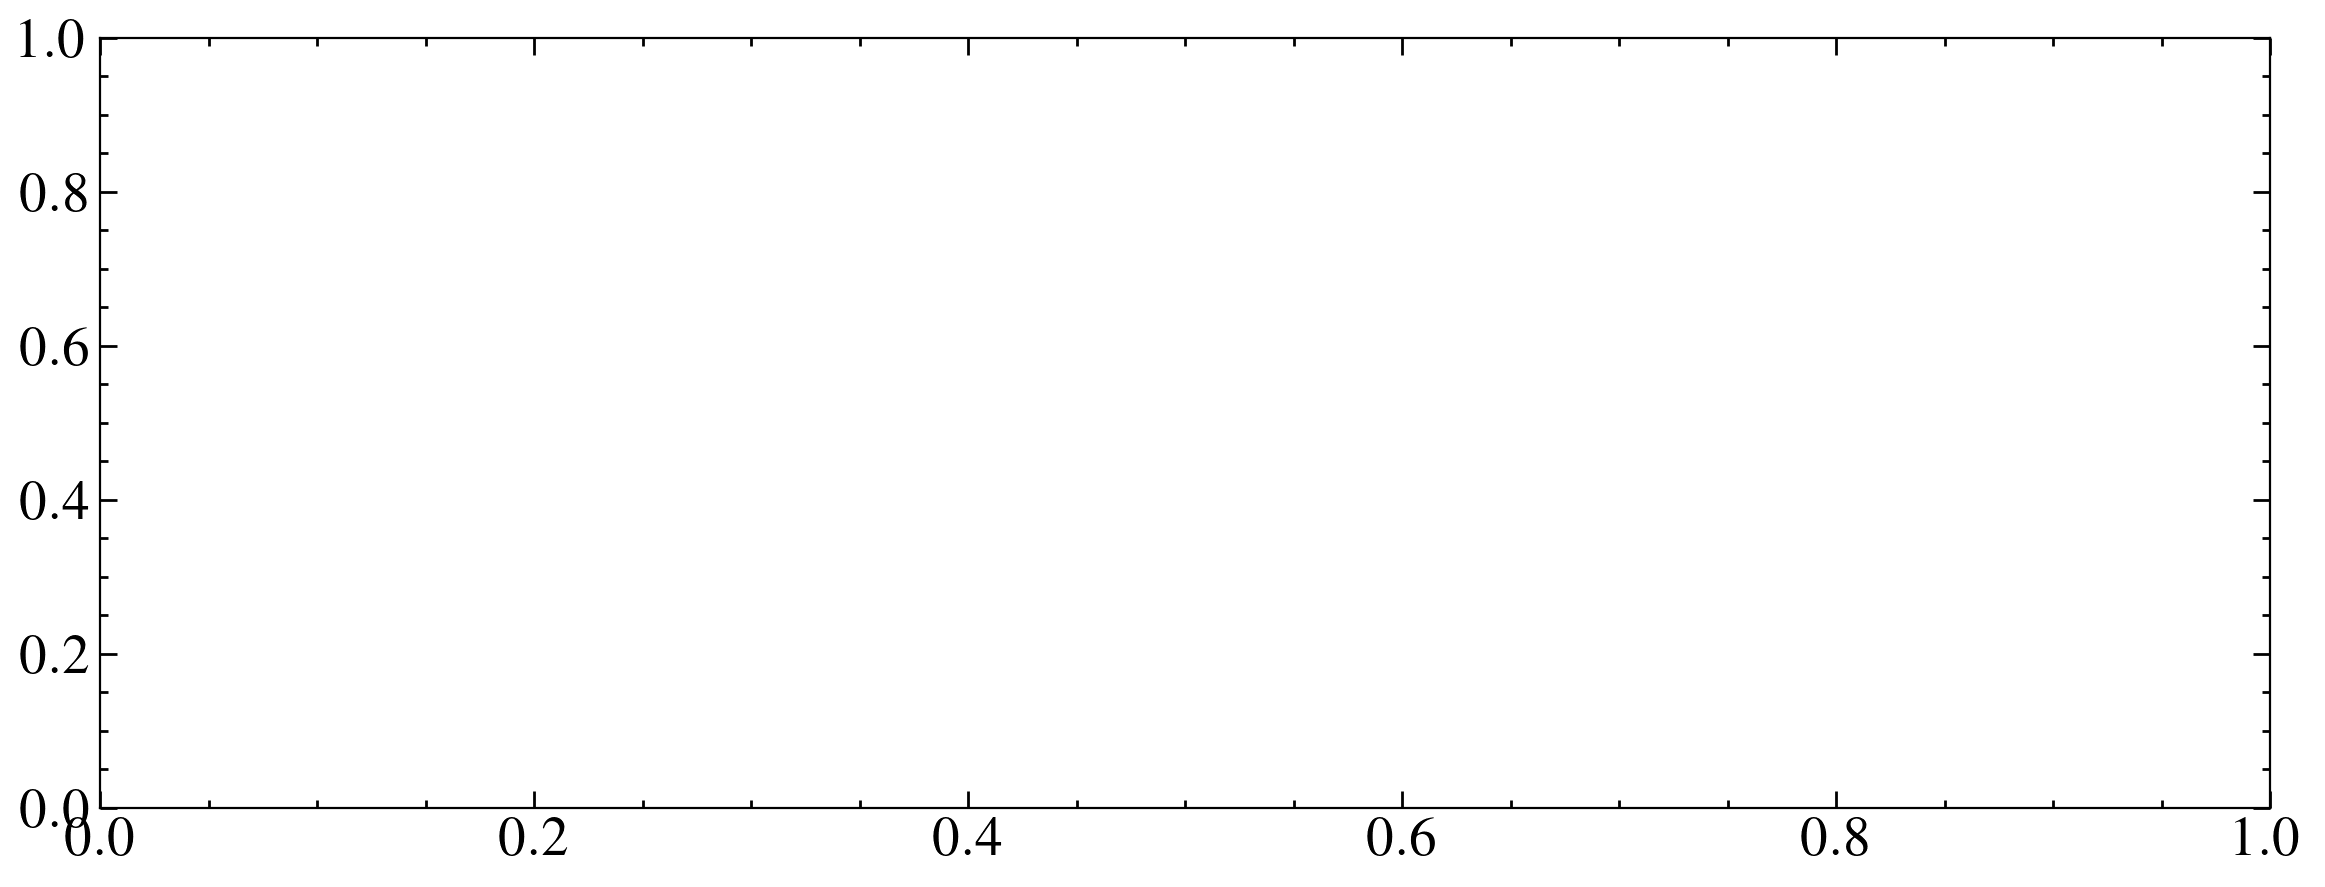

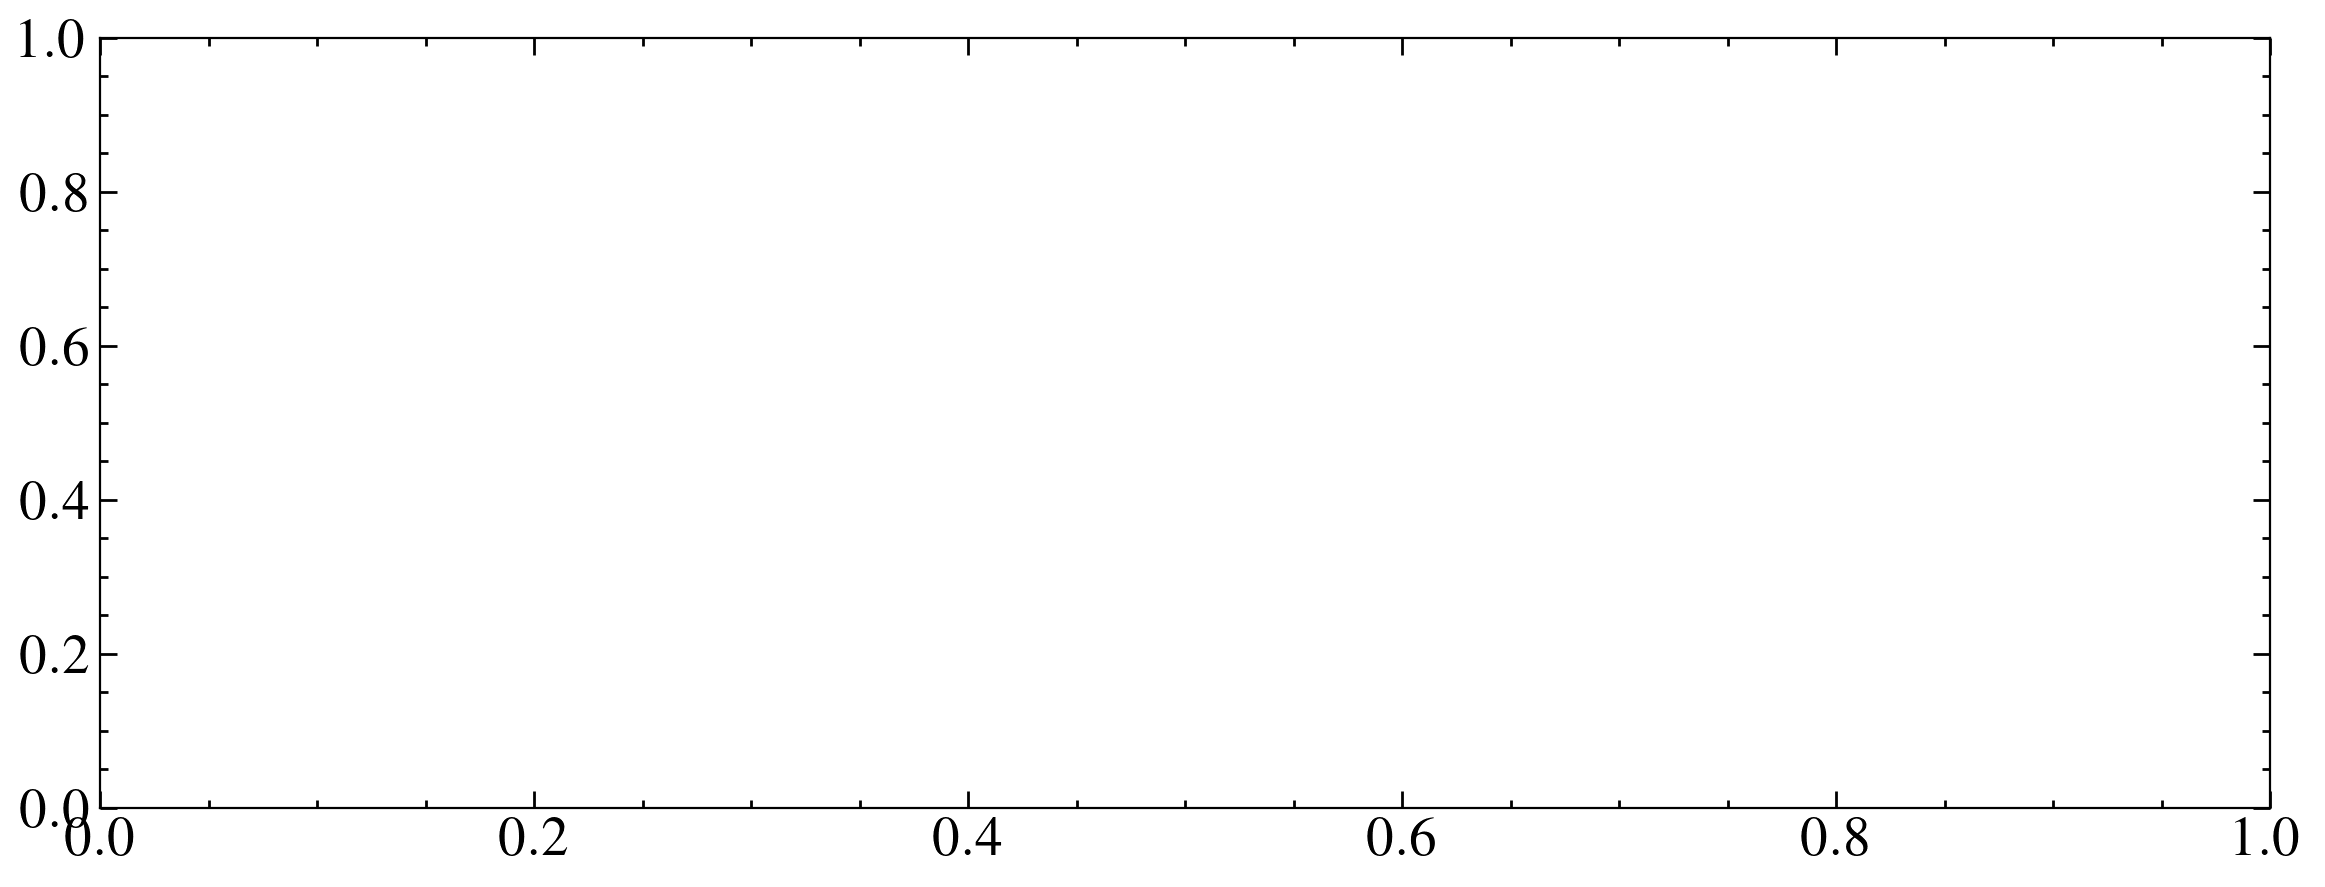

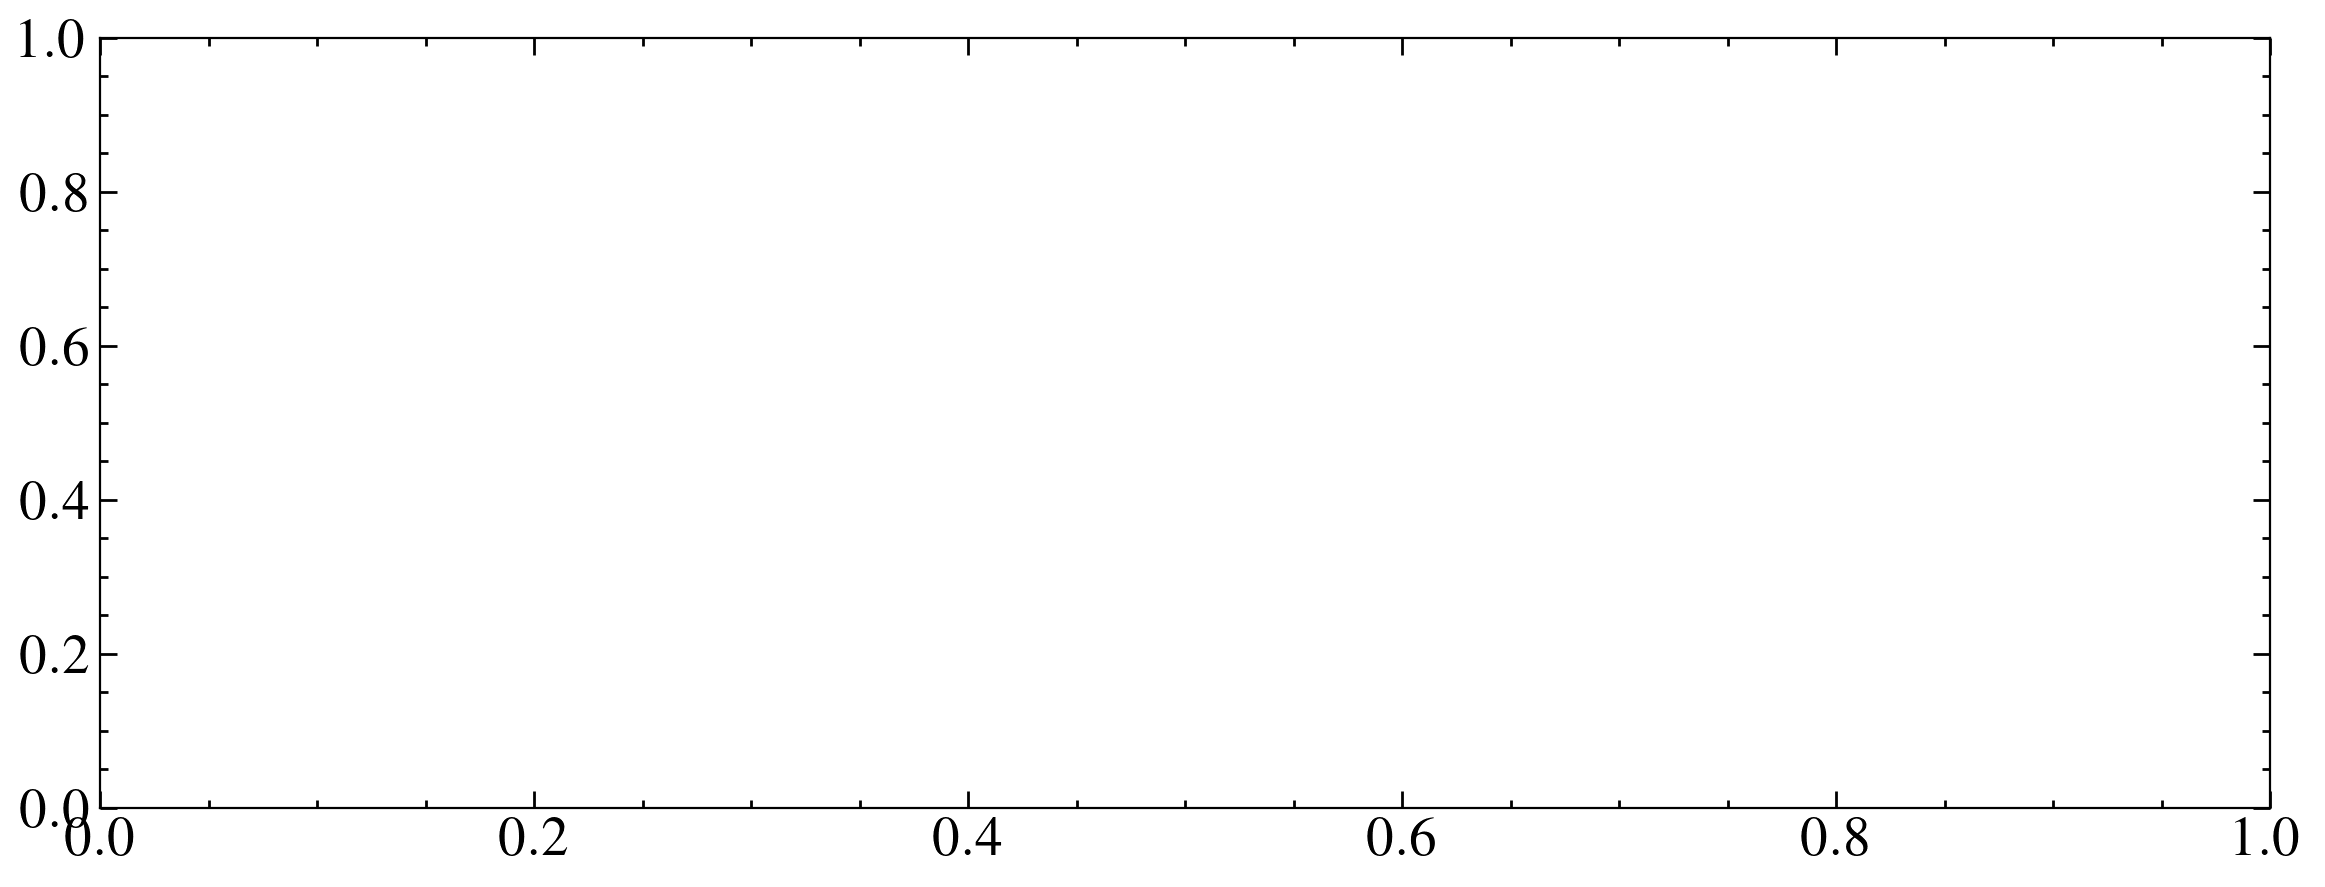

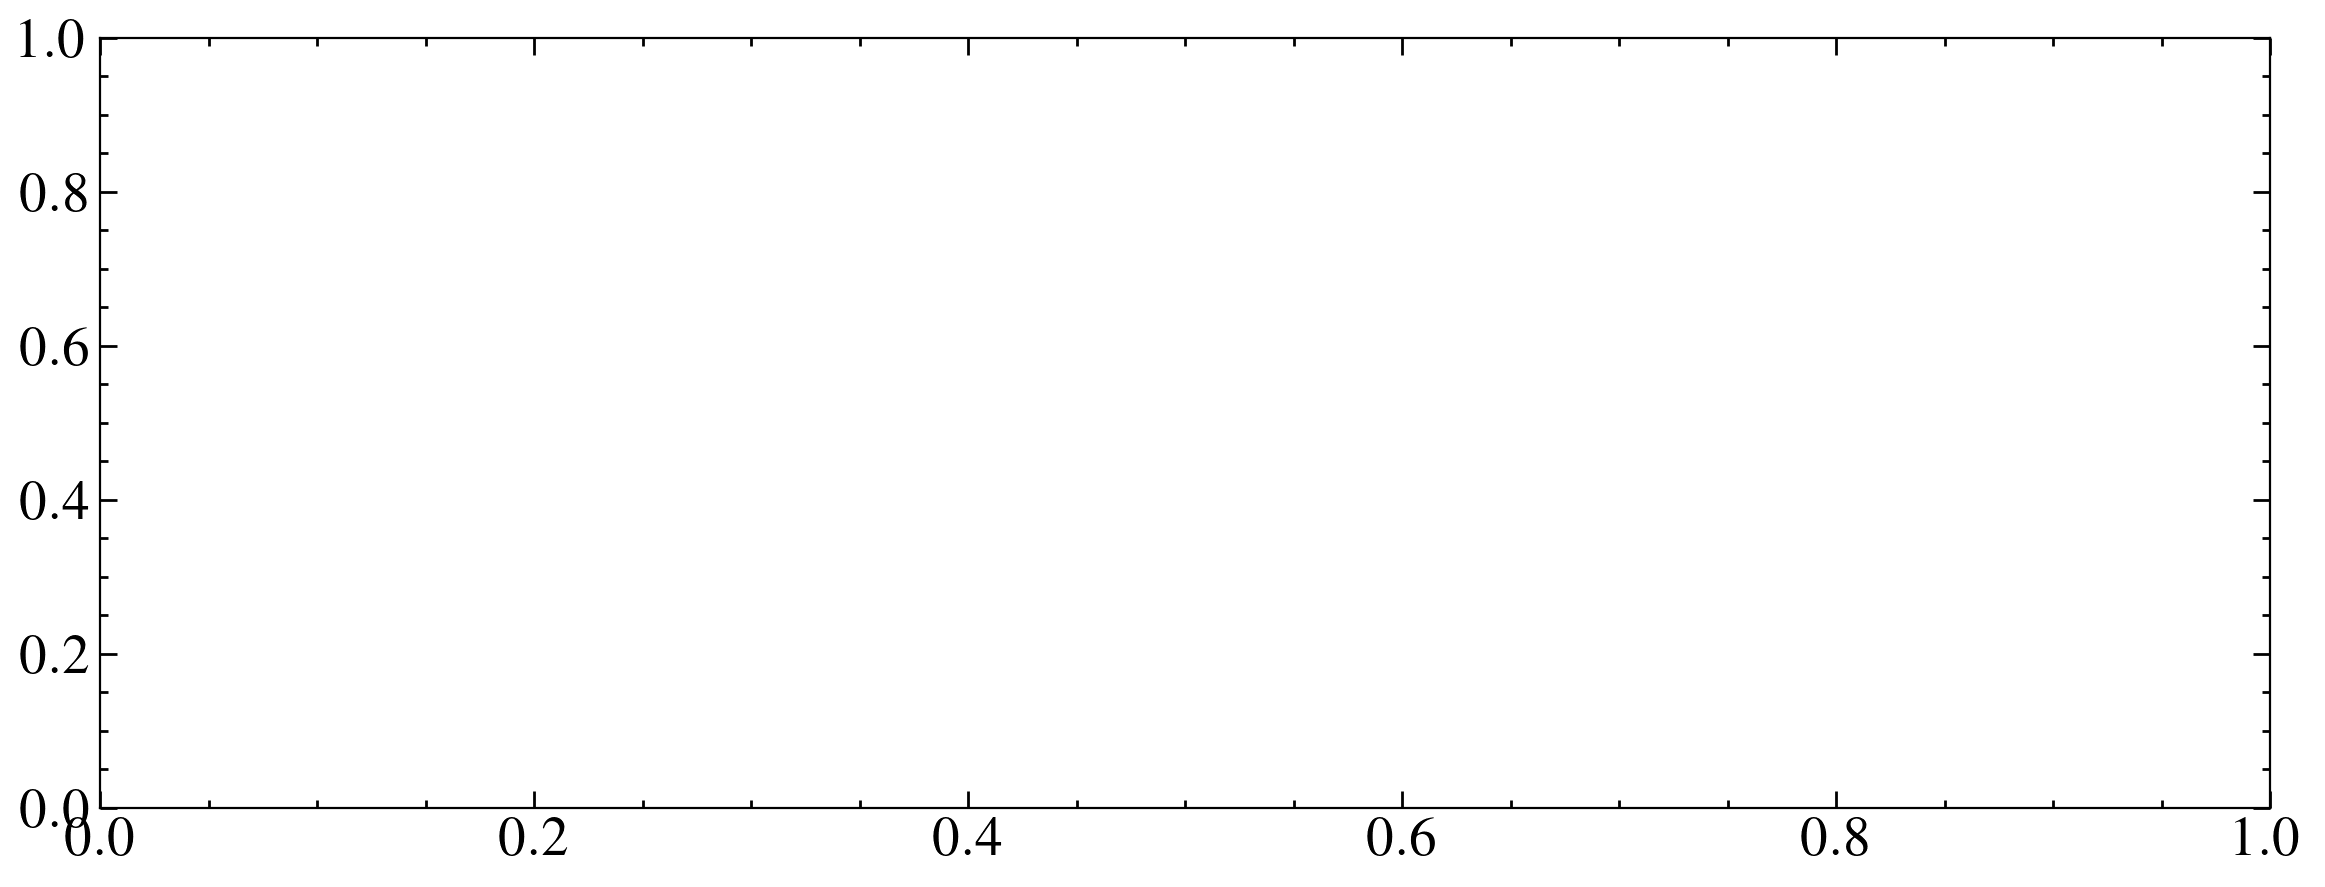

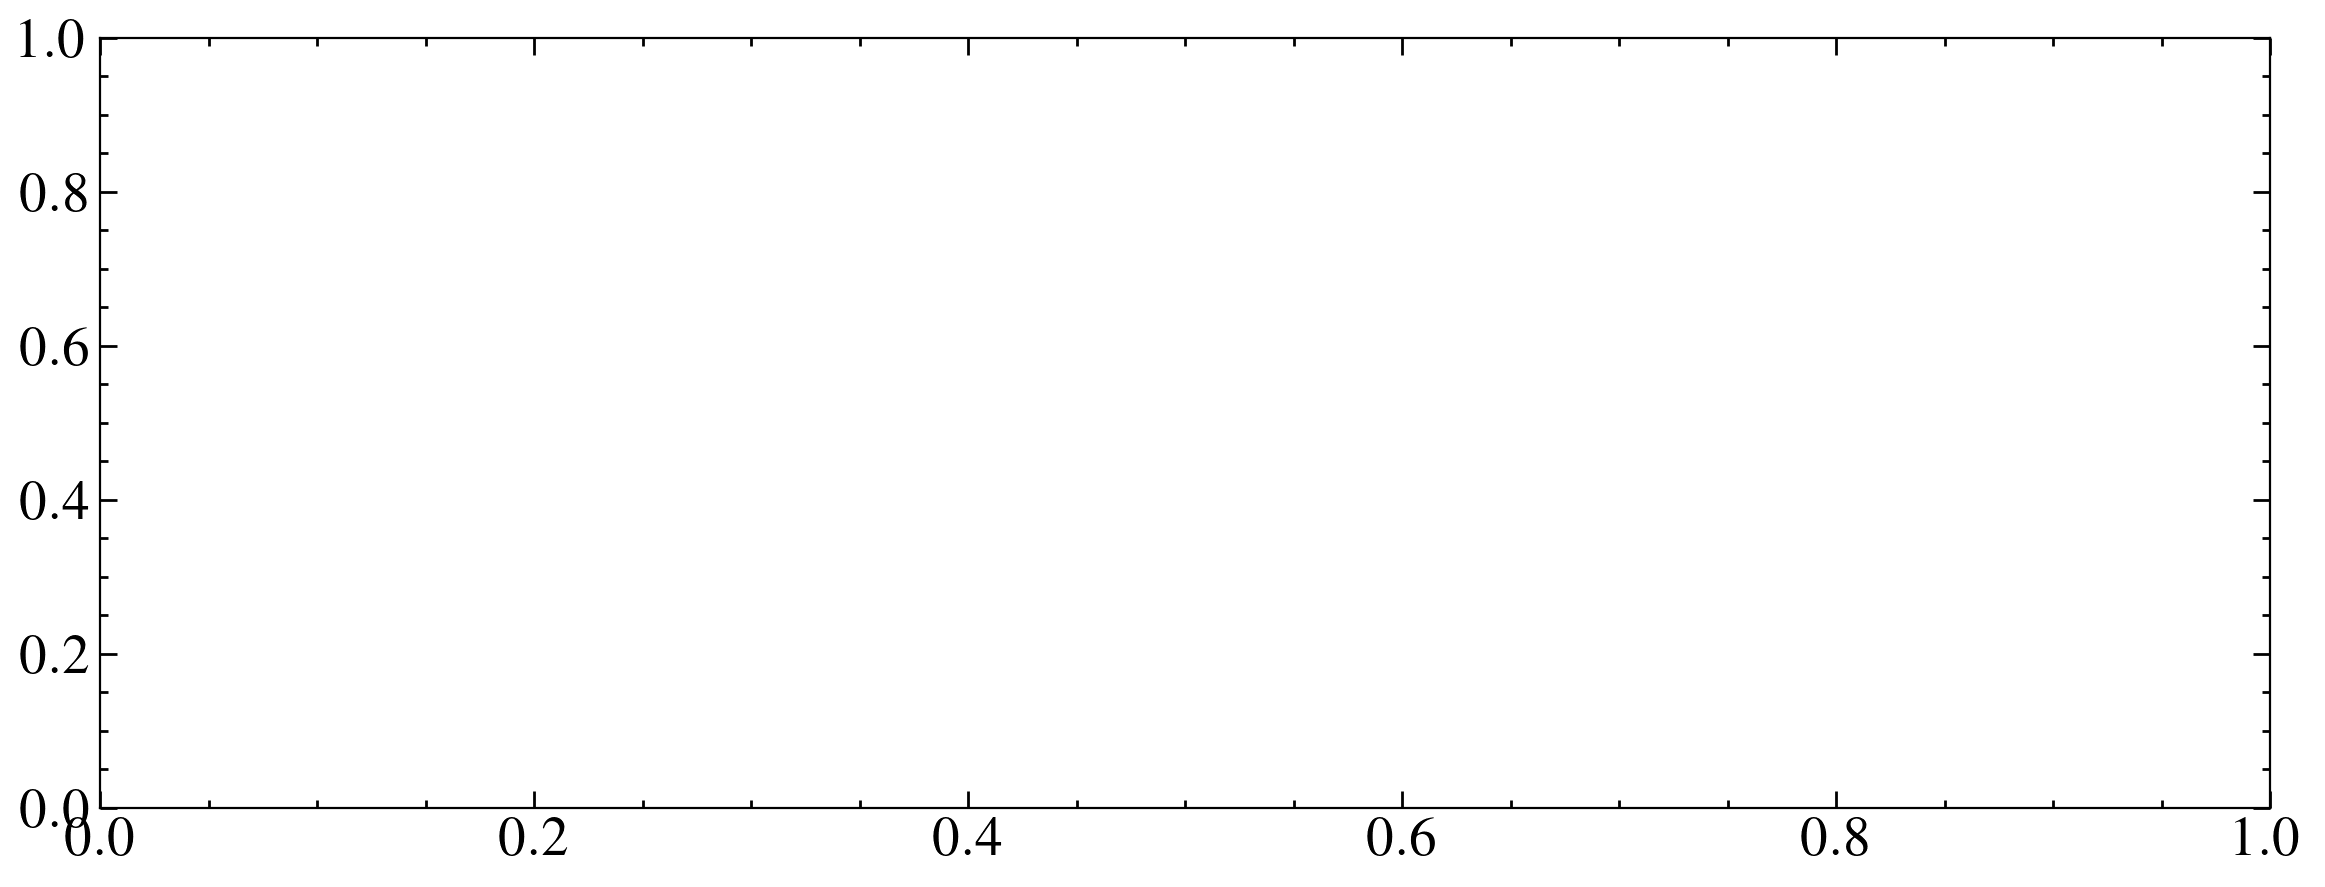

In [22]:
for star in stars:
    # print(star)
    search_result = lk.search_lightcurve(star)
    # print(search_result)
    mask = (search_result.exptime == 120*u.s) & (search_result.author == 'SPOC') #| (search_result.exptime == 1800*u.s) & (search_result.author == 'K2') #ktwo215632123
    lcs120 = search_result[mask]
    if len(lcs120) > 0:
        fig, ax = plt.subplots()
        for i, sr in enumerate(lcs120):
            print(star)
            lc = sr.download(download_dir='mastDownload/')
            # lc = lc.remove_outliers(sigma=7).normalize()

            lc = lc.normalize()
            # pg = lc.to_periodogram(method='ls',oversample_factor=10, minimum_period=1*u.hr, maximum_period = 14*u.d)
            # ax.scatter(lc.time.value, lc.flux.value, s=5, alpha=0.5)
            # ax.axhline(np.median(lc.flux.value))

            # lc.scatter()
            # pg.plot(scale='log')
            # pg.plot()
            # print(star, pg.period_at_max_power)
        
    

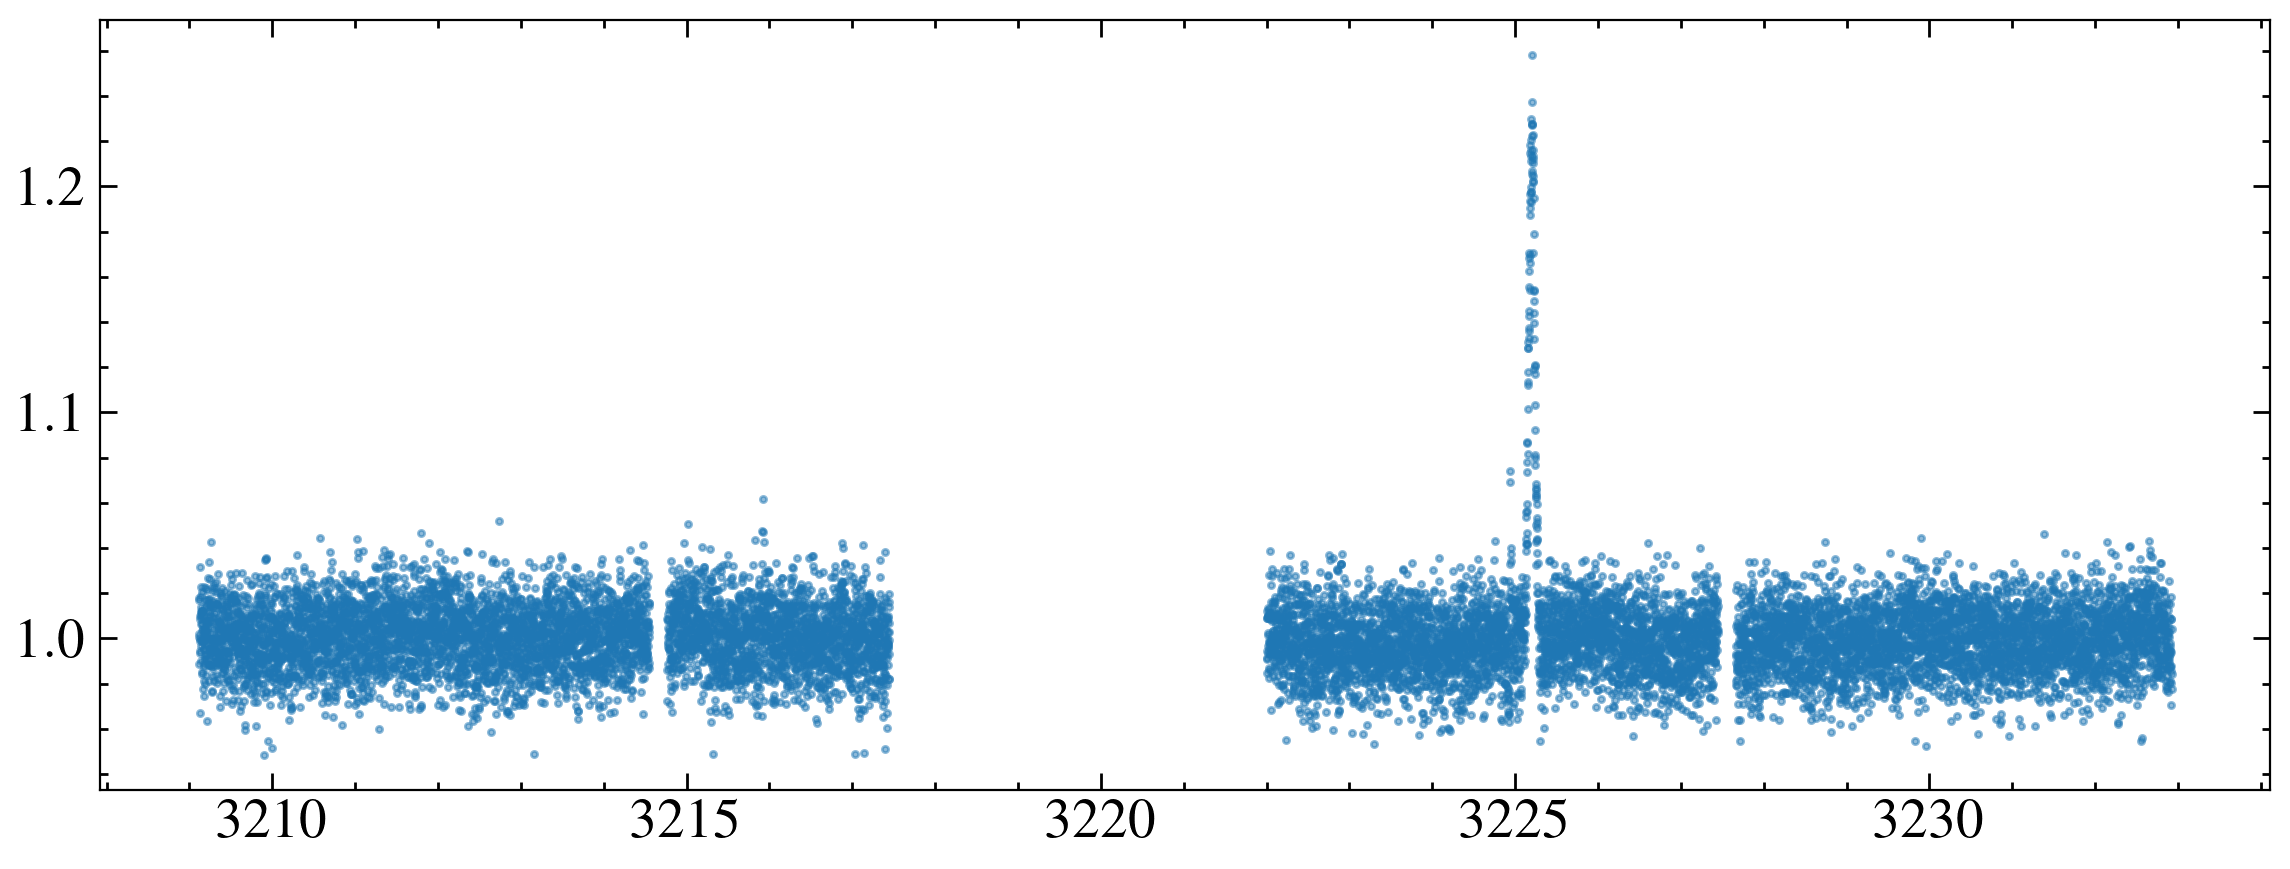

In [23]:
fig, ax = plt.subplots()

ax.scatter(lc.time.value, lc.flux, s=5, alpha=0.5)

# ax.set_xlim(3215.75, 3216.1)
# ax.set_xlim(3225, 3226)

In [6]:
tpf = lk.search_targetpixelfile("TRAPPIST-1")
tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,K2 Campaign 12,2016,K2,60,ktwo246199087,0.0
1,K2 Campaign 12,2016,K2,1800,ktwo246199087,0.0
2,K2 Campaign 19,2018,K2,60,ktwo246199087,0.0
3,K2 Campaign 19,2018,K2,1800,ktwo246199087,0.0
4,TESS Sector 70,2023,SPOC,20,278892590,0.0
5,TESS Sector 70,2023,SPOC,120,278892590,0.0
6,TESS Sector 70,2023,TESS-SPOC,200,278892590,0.0


In [7]:
tpf = tpf[5].download(dowload_dir='/home/david/work/misc/tess_movie/')

In [8]:
tpf.interact()

In [24]:


# times = lc.time.value

# cross_time = times[np.argmax(lc.flux)]

# cross_time = (cross_time + 2457000)*cds.jd

cross_time = lc.time[np.argmax(lc.flux)]
print(cross_time)
print(cross_time.isot)

3225.2041009309537
2023-10-07T16:53:54.320
